In [4]:
# Dependencies and Setup
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
from math import trunc

In [6]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [7]:
# File to Load and read
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")

In [45]:
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [9]:
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [11]:
# Combine the data into a single dataset
merge_data=pd.merge(mouse_drug_data, clinical_trial_data, on = "Mouse ID", how = "outer")

# Display the data table for preview
merge_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [12]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Mean_tumor_volume = merge_data.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']
Mean_tumor_volume.head()


Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Convert to DataFrame
Tumor_response_df = pd.DataFrame(Mean_tumor_volume)

In [47]:
# Preview DataFrame
Tumor_response_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [49]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SEM_Tumor_response = Tumor_response_df.sem
SEM_Tumor_response


<bound method DataFrame.sem of                      Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
         

In [16]:
# Minor Data Munging to Re-Format the Data Frames
Tumor_response = pd.pivot_table(merge_data, index='Timepoint', columns='Drug', values='Tumor Volume (mm3)',
                                aggfunc = np.mean)

# Preview that Reformatting worked
Tumor_response.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [17]:
Tumor_volume = Tumor_response.mean()
Tumor_volume


Drug
Capomulin    40.485084
Ceftamin     53.752434
Infubinol    54.963549
Ketapril     56.806906
Naftisol     55.891024
Placebo      56.012209
Propriva     54.911934
Ramicane     39.986931
Stelasyn     55.981636
Zoniferol    54.660451
dtype: float64

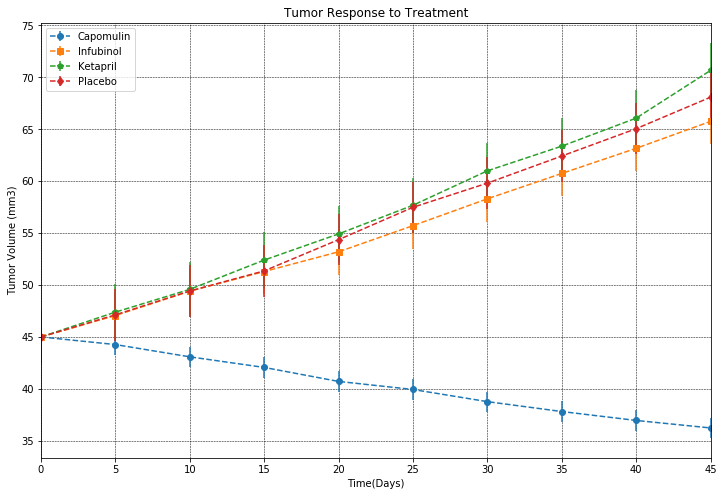

In [38]:
# Generate the Plot (with Error Bars)
Timepoint = Tumor_response.index
plt.figure(figsize=(12,8))
plt.errorbar(Timepoint, Tumor_response['Capomulin'],yerr=Tumor_response['Capomulin'].sem(), marker ='o', linestyle='--', label="Capomulin")

plt.errorbar(Timepoint, Tumor_response['Infubinol'],yerr=Tumor_response['Infubinol'].sem(), marker ='s', linestyle='--', label="Infubinol")
plt.errorbar(Timepoint, Tumor_response['Ketapril'],yerr=Tumor_response['Ketapril'].sem(), marker ='p', linestyle='--', label="Ketapril")

plt.errorbar(Timepoint, Tumor_response['Placebo'],yerr=Tumor_response['Placebo'].sem(), marker ='d', linestyle='--', label="Placebo")

plt.gca().set(xlabel = 'Time(Days)', ylabel = 'Tumor Volume (mm3)',title = 'Tumor Response to Treatment',xlim = (0,max(Timepoint)))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()

# Save the Figure



In [19]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [20]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Met_response =  merge_data.groupby(['Drug','Timepoint']).mean()[['Metastatic Sites']]
Met_response.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [21]:
# Convert to DataFrame
Met_response_df = pd.DataFrame(Met_response)


In [22]:
# Preview DataFrame
Met_response_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [24]:
# Minor Data Munging to Re-Format the Data Frames
Metastatic_sites = pd.pivot_table(Met_response, index='Timepoint', columns='Drug', 
                                  values='Metastatic Sites', aggfunc = np.mean)

Metastatic_sites.head()


# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


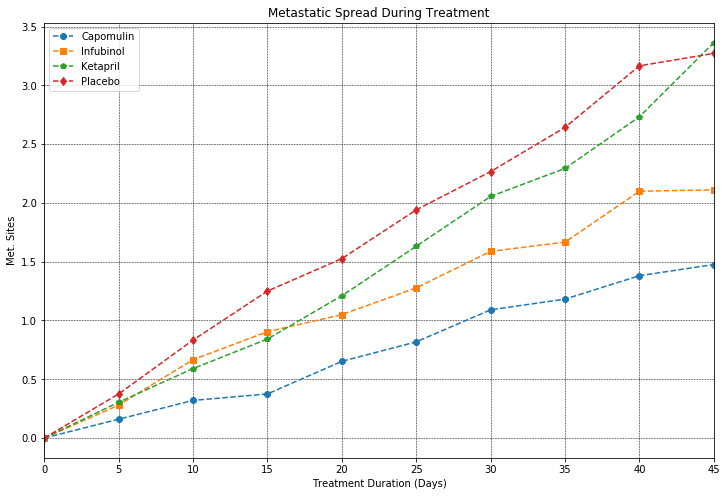

In [39]:
# Generate the Plot (with Error Bars)
Metastatic = Metastatic_sites.index
plt.figure(figsize=(12,8))

plt.plot(Metastatic, Metastatic_sites['Capomulin'], marker ='o', linestyle='--', label="Capomulin")
plt.plot(Metastatic, Metastatic_sites['Infubinol'], marker ='s', linestyle='--', label="Infubinol")
plt.plot(Metastatic, Metastatic_sites['Ketapril'], marker ='p', linestyle='--', label="Ketapril")
plt.plot(Metastatic, Metastatic_sites['Placebo'], marker ='d', linestyle='--', label="Placebo")

plt.gca().set(xlabel = 'Treatment Duration (Days)', ylabel = 'Met. Sites',title = 'Metastatic Spread During Treatment',xlim = (0,max(Metastatic)))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()


#Capomulin, Infubinol, Ketapril, and Placebo




In [ ]:
# Save the Figure

## Survival Rates

In [27]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count =  merge_data.groupby(['Drug','Timepoint']).count()[['Mouse ID']]
mouse_count.head()

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count)

In [111]:
# Preview DataFrame
mouse_count_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [28]:
# Minor Data Munging to Re-Format the Data Frames
Mouse_Data = pd.pivot_table(mouse_count, index='Timepoint', columns='Drug', values='Mouse ID', aggfunc = np.mean)

# Preview the Data Frame
Mouse_Data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [29]:
Survival_percent = Mouse_Data.copy()
Survival_percent = round(Survival_percent.apply(lambda c: c / c.max() * 100, axis=0),2)
Survival_percent.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.15,100.0,96.15,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.46,96.0,88.46,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.38,96.0,88.46,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.38,92.0,80.77,68.0


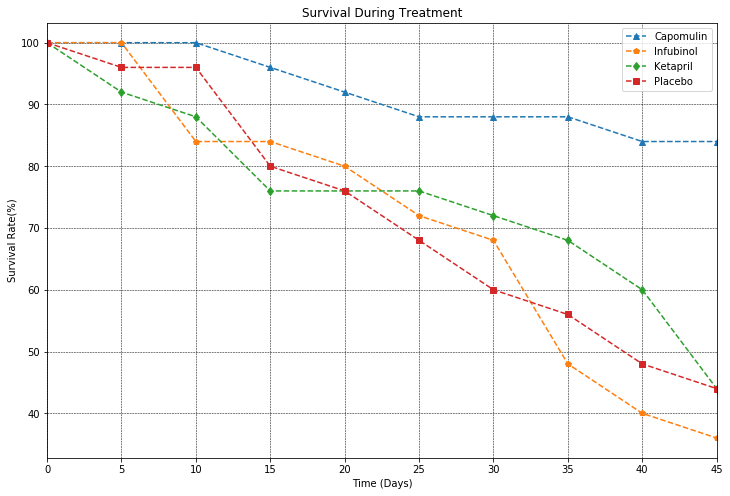

In [40]:
# Generate the Plot (Accounting for percentages)
Survival_rate =  Survival_percent.index
plt.figure(figsize=(12,8))

plt.plot(Survival_rate, Survival_percent['Capomulin'], marker ='^', linestyle='--', label="Capomulin")

plt.plot(Survival_rate, Survival_percent['Infubinol'], marker ='p', linestyle='--', label="Infubinol")
plt.plot(Survival_rate, Survival_percent['Ketapril'], marker ='d', linestyle='--', label="Ketapril")

plt.plot(Survival_rate, Survival_percent['Placebo'], marker ='s', linestyle='--', label="Placebo")

plt.gca().set(xlabel = 'Time (Days)', ylabel = 'Survival Rate(%)',title = 'Survival During Treatment',xlim = (0,max(Survival_rate)))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()

#Capomulin, Infubinol, Ketapril, and Placebo


In [ ]:
# Save the Figure


## Summary Bar Graph

In [52]:
# Calculate the percent changes for each drug
Drug_Change_Percent = (((Tumor_response.iloc[-1]-Tumor_response.iloc[0])/Tumor_response.iloc[0])*100).to_frame("% Change")

Drug_Change_Percent


,% Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


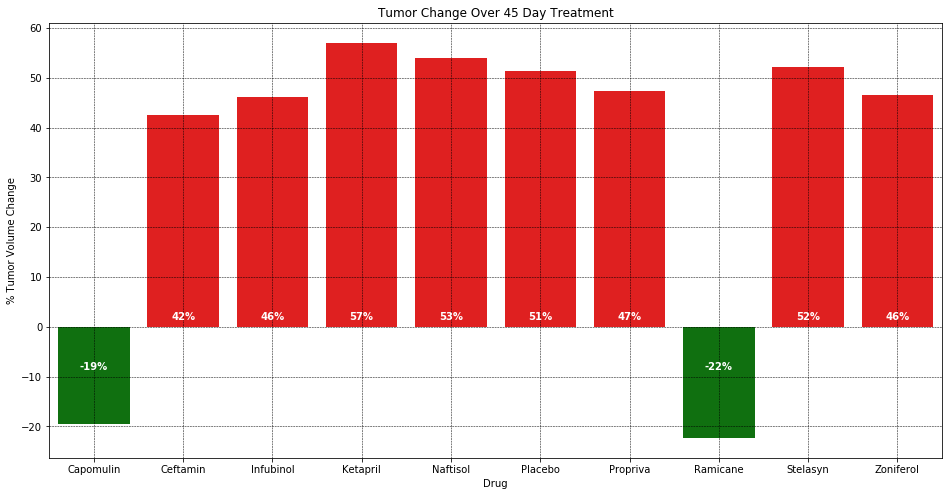

In [50]:
# Store all Relevant Percent Changes into a Tuple

x=Drug_Change_Percent.index

y=Drug_Change_Percent['% Change']

plt.figure(figsize=(16,8))

colors = ['red' if _y >=0 else 'green' for _y in y]

ax = sn.barplot(x, y, palette=colors)

for n, (label, _y) in enumerate(zip(x, y)):
    if _y <= 0:
        ax.annotate(
            s='{:d}%'.format(trunc(_y)), xy=(n, -10), ha='center',va='center',
            xytext=(0,10), color='w', textcoords='offset points', weight='bold')
    else:
        ax.annotate(
            s='{:d}%'.format(trunc(_y)), xy=(n, 0), ha='center',va='center',
            xytext=(0,10), color='w', textcoords='offset points', weight='bold')  

        
plt.gca().set(xlabel='Drug', ylabel='% Tumor Volume Change', title='Tumor Change Over 45 Day Treatment')

plt.rc('grid', linestyle="--", color='black', linewidth=0.5)

plt.grid(True)

plt.show()



In [ ]:
OBSERVATIONS
1. Mice that were administered Capomulin had the highest survival rate durng treatment.
2. Metastatic sites spread on the mice was lowest with the Capomulin durung treatment period.
3. The tumor response volume was lowest with the adminstation of Capomulin.